In [85]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [86]:
def isNaN(num):
    return num != num

In [87]:
csv = pd.read_csv('hungary_deaths.csv', sep=',')
csv

,Év,A hét sorszáma,kezdő napja,záró napja,0–34,35–39,40–44,45–49,50–54,55–59,...,50–54.2,55–59.2,60–64.2,65–69.2,70–74.2,75–79.2,80–84.2,85–89.2,90+.2,Összesen.2
0,2015.0,1,2014/ december 29.,2015/ január 4.,19,13,15,38,71,111,...,106,157,270,258,301,388,502,423,268,"2,800"
1,NaN,2,2015/ január 5.,2015/ január 11.,25,7,33,40,60,139,...,93,202,291,295,329,402,498,407,344,"3,005"
2,NaN,3,2015/ január 12.,2015/ január 18.,21,8,17,37,74,115,...,100,175,262,257,348,415,458,448,313,"2,900"
3,NaN,4,2015/ január 19.,2015/ január 25.,24,16,14,37,58,112,...,98,181,281,296,335,402,507,460,305,"3,005"
4,NaN,5,2015/ január 26.,2015/ február 1.,19,9,20,30,51,121,...,85,183,266,284,341,428,498,505,344,"3,067"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,NaN,41,2020/ október 5.,2020/ október 11.,21,11,12,31,64,80,...,88,121,183,290,313,376,383,402,261,"2,520"
302,NaN,42,2020/ október 12.,2020/ október 18.,16,9,17,38,58,72,...,80,120,227,325,317,406,400,406,298,"2,686"
303,NaN,43,2020/ október 19.,2020/ október 25.,29,8,14,44,61,82,...,83,118,207,340,376,424,480,401,334,"2,910"
304,NaN,44,2020/ október 26.,2020/ november 1.,24,4,16,43,61,76,...,90,114,239,381,374,461,487,445,350,"3,073"


In [88]:
last_year = 2014
for i in range(0, len(csv)):    
    if (not pd.isnull(csv["Év"][i])):
        last_year = last_year + 1
    csv["Év"][i] = last_year
csv

,Év,A hét sorszáma,kezdő napja,záró napja,0–34,35–39,40–44,45–49,50–54,55–59,...,50–54.2,55–59.2,60–64.2,65–69.2,70–74.2,75–79.2,80–84.2,85–89.2,90+.2,Összesen.2
0,2015.0,1,2014/ december 29.,2015/ január 4.,19,13,15,38,71,111,...,106,157,270,258,301,388,502,423,268,"2,800"
1,2015.0,2,2015/ január 5.,2015/ január 11.,25,7,33,40,60,139,...,93,202,291,295,329,402,498,407,344,"3,005"
2,2015.0,3,2015/ január 12.,2015/ január 18.,21,8,17,37,74,115,...,100,175,262,257,348,415,458,448,313,"2,900"
3,2015.0,4,2015/ január 19.,2015/ január 25.,24,16,14,37,58,112,...,98,181,281,296,335,402,507,460,305,"3,005"
4,2015.0,5,2015/ január 26.,2015/ február 1.,19,9,20,30,51,121,...,85,183,266,284,341,428,498,505,344,"3,067"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2020.0,41,2020/ október 5.,2020/ október 11.,21,11,12,31,64,80,...,88,121,183,290,313,376,383,402,261,"2,520"
302,2020.0,42,2020/ október 12.,2020/ október 18.,16,9,17,38,58,72,...,80,120,227,325,317,406,400,406,298,"2,686"
303,2020.0,43,2020/ október 19.,2020/ október 25.,29,8,14,44,61,82,...,83,118,207,340,376,424,480,401,334,"2,910"
304,2020.0,44,2020/ október 26.,2020/ november 1.,24,4,16,43,61,76,...,90,114,239,381,374,461,487,445,350,"3,073"


In [89]:
deaths_per_week = csv[["Összesen.2"]]
deaths_per_week

,Összesen.2
0,"2,800"
1,"3,005"
2,"2,900"
3,"3,005"
4,"3,067"
...,...
301,"2,520"
302,"2,686"
303,"2,910"
304,"3,073"


In [90]:
deaths_per_year = pd.DataFrame(columns=range(2015, 2020+1), index=pd.RangeIndex(1, 54, name='week'), dtype='Int64')

for index, row in csv[["Év", "A hét sorszáma", "Összesen.2"]].iterrows():
    year = int(row["Év"])
    week = int(row["A hét sorszáma"])
    deaths_per_year.loc[week, year] = int(row["Összesen.2"].replace(",",""))


In [91]:
deaths_per_year

,2015,2016,2017,2018,2019,2020
week,,,,,,
1,2800,2823,3155,2595,3054,2609
2,3005,2640,3311,2546,3090,2586
3,2900,2562,3449,2675,3037,2582
4,3005,2615,3574,2655,3234,2720
5,3067,2483,3616,2731,3384,2800
6,3350,2640,3256,2833,3263,2634
7,3280,2575,2991,3037,3034,2750
8,3349,2491,2890,3161,2888,2586
9,3120,2535,2668,3237,2909,2782


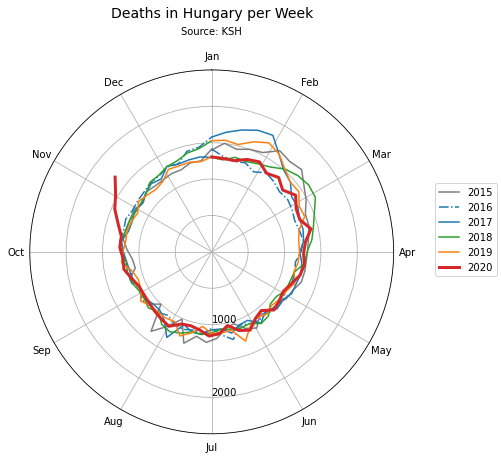

In [92]:
def data_for_year(y):
    year = deaths_per_year[y].dropna().to_numpy()
    if y == 2020:
        num_weeks = len(year)
        day_of_the_year = num_weeks*7 - 3 # ex. week 46 -> november 15 -> day 319
        theta = np.linspace(0, (day_of_the_year/365)*2*np.pi, num_weeks)
    else:
        # append first week of next year for correct radial plotting
        year = np.append(year, deaths_per_year.loc[1, y+1])
        theta = np.linspace(0, 2*np.pi, len(year))
    return (theta, year)

def plot_year(ax, y, **kwargs):
    ax.plot(*data_for_year(y), label=f"{y}", **kwargs)

def setup_polar_plot(figsize=(8, 6), constrained_layout=True):
    fig = plt.figure(figsize=figsize, constrained_layout=constrained_layout)
    ax = fig.add_subplot(111, projection='polar')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/6))
    ax.set_xticklabels(months)

    ax.set_rlabel_position(180)
    ax.set_yticklabels(['', '1000', '', '2000', ''])

    return fig, ax

fig, ax = setup_polar_plot()

# plot_year(ax, 2000, linewidth=0.5)
# plot_year(ax, 2001, linewidth=0.5)
# plot_year(ax, 2002, linewidth=0.5)
# plot_year(ax, 2003, linewidth=0.5)
# plot_year(ax, 2004, linewidth=0.5)
# plot_year(ax, 2005, linewidth=0.5)
# plot_year(ax, 2006, linewidth=0.5)
# plot_year(ax, 2007, linewidth=0.5)
# plot_year(ax, 2008, linewidth=0.5)
# plot_year(ax, 2009, linewidth=0.5)
# plot_year(ax, 2010, linewidth=0.5)

plot_year(ax, 2015, color='tab:gray')
plot_year(ax, 2016, color='tab:blue', linestyle='dashdot')
plot_year(ax, 2017, color='tab:blue')
plot_year(ax, 2018, color='tab:green')
plot_year(ax, 2019, color='tab:orange')
plot_year(ax, 2020, color='tab:red', linewidth=3)

ax.set_rmax(5000)
fig.legend(loc='center right')

fig.suptitle("Deaths in Hungary per Week", fontsize=14, y=1.04)
ax.set_title("Source: KSH", fontsize=10, y=1.08)

plt.savefig('deathshun.png', dpi=300, bbox_inches='tight', facecolor='white')

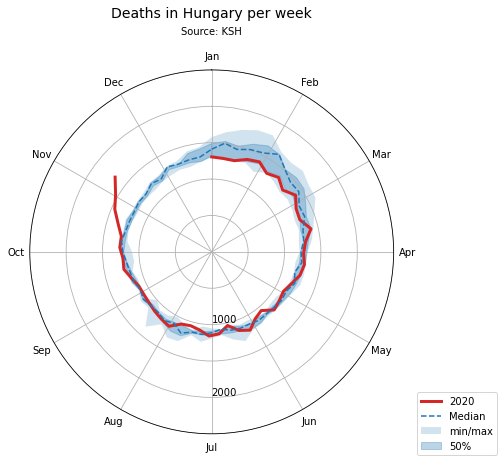

In [93]:
years = deaths_per_year.iloc[:, :-1] # excluding 2020

mean = years.mean(axis=1)
mean[53] = mean[1]

median = years.median(axis=1)
median[53] = median[1]

min = years.min(axis=1)
min[53] = min[1]

max = years.max(axis=1)
max[53] = max[1]

q25 = deaths_per_year.quantile(0.25, axis=1).astype(float)
q25[53] = q25[1]

q75 = deaths_per_year.quantile(0.75, axis=1).astype(float)
q75[53] = q75[1]

fig, ax = setup_polar_plot()

# ax.plot(np.linspace(0, 2*np.pi, len(mean)), mean, label="5y mean")
# ax.plot(np.linspace(0, 2*np.pi, len(data_for_year(2019))), data_for_year(2019), label="2019")

ax.fill_between(np.linspace(0, 2*np.pi, len(min)), min, max, alpha=0.2, label="min/max")
ax.fill_between(np.linspace(0, 2*np.pi, len(q25)), q25, q75, alpha=0.3, label="50%", color='tab:blue')

plot_year(ax, 2020, color='tab:red', linewidth=3)
ax.plot(np.linspace(0, 2*np.pi, len(median)), median, label="Median", linestyle='dashed')


ax.set_rmax(5000)
fig.legend(loc='lower right')

fig.suptitle(f"Deaths in Hungary per week", fontsize=14, y=1.04)
ax.set_title("Source: KSH", fontsize=10, y=1.08)

plt.savefig('median.png', dpi=300, bbox_inches='tight', facecolor='white')

2015 1
2015 2
2015 3
2015 4
2015 5
2015 6
2015 7
2015 8
2015 9
2015 10
2015 11
2015 12
2015 13
2015 14
2015 15
2015 16
2015 17
2015 18
2015 19
2015 20
2015 21
2015 22
2015 23
2015 24
2015 25
2015 26
2015 27
2015 28
2015 29
2015 30
2015 31
2015 32
2015 33
2015 34
2015 35
2015 36
2015 37
2015 38
2015 39
2015 40
2015 41
2015 42
2015 43
2015 44
2015 45
2015 46
2015 47
2015 48
2015 49
2015 50
2015 51
2015 52
2015 53
2015 54
2016 2
2016 3
2016 4
2016 5
2016 6
2016 7
2016 8
2016 9
2016 10
2016 11
2016 12
2016 13
2016 14
2016 15
2016 16
2016 17
2016 18
2016 19
2016 20
2016 21
2016 22
2016 23
2016 24
2016 25
2016 26
2016 27
2016 28
2016 29
2016 30
2016 31
2016 32
2016 33
2016 34
2016 35
2016 36
2016 37
2016 38
2016 39
2016 40
2016 41
2016 42
2016 43
2016 44
2016 45
2016 46
2016 47
2016 48
2016 49
2016 50
2016 51
2016 52
2016 53
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12
2017 13
2017 14
2017 15
2017 16
2017 17
2017 18
2017 19
2017 20
2017 21
2017 22
2017 23
2

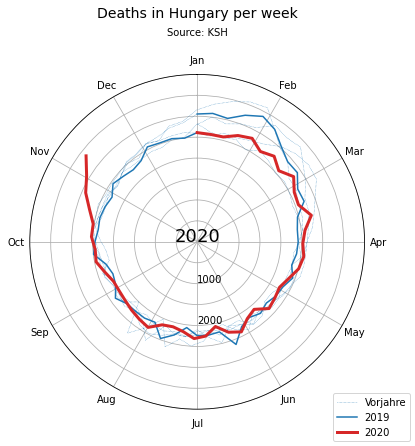

In [96]:
fig, ax = setup_polar_plot(figsize=(6, 6.2), constrained_layout=False)

# nudge ax position
pos = ax.get_position()
pos.y0 -= 0.05
pos.y1 -= 0.05
pos.x0 -= 0.012
pos.x1 -= 0.012
ax.set_position(pos)

fig.suptitle("Deaths in Hungary per week", fontsize=14)
ax.set_title("Source: KSH", fontsize=10, y=1.1)

old, = ax.plot([], [], color='tab:blue', linewidth=0.5, linestyle='dotted', label="Vorjahre")
prev, = ax.plot([], [], color='tab:blue', label="2019")
current, = ax.plot([], [], color='tab:red', linewidth=3, label="2020")
center = ax.text(0, 25, "2015", horizontalalignment='center', fontsize=18)
ax.set_rmax(4000)

start_year = 2015

def year_and_week_for_index(i):
    y = start_year
    while True:
        len_year = len(deaths_per_year[y].dropna()) + 1
        if len_year > i:
            return (y, i+1)
        else:
            y += 1
            i -= (len_year-1)

def data_for_index(i):
    y, w = year_and_week_for_index(i)
    print(y, w)
    theta, year = data_for_year(y)
    return theta[:w], year[:w]

def init():
    old.set_data([], []) 
    prev.set_data([], []) 
    current.set_data([], []) 
    center.set_text("")
    return old, prev, current, center

def animate(i):
    y = year_and_week_for_index(i)[0]

    if y > start_year:
        old_theta = np.array([])
        old_data = np.array([])
        for year in range(start_year, y-1):
            theta, data = data_for_year(year)
            old_theta = np.append(old_theta, theta)
            old_data = np.append(old_data, data)
        old.set_data(old_theta, old_data)
        prev.set_data(*data_for_year(y-1))

    current.set_data(*data_for_index(i))
    center.set_text(f"{y}")
    return old, prev, current, center

num_frames = len(deaths_per_week)

anim = mpl.animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, interval=50, blit=True) 
anim.save('deaths.mp4', writer='ffmpeg', dpi=300, extra_args=['-vf', 'tpad=stop_mode=clone:stop_duration=5'])

fig.legend(loc='lower right')

plt.savefig('deaths.png', dpi=300, bbox_inches='tight', facecolor='white')

# anim.save('anim.gif', writer='imagemagick', dpi=300, savefig_kwargs={'facecolor': 'white'}) 
# plt.savefig('anim.png', dpi=300, bbox_inches='tight', facecolor='white')

# $ ffmpeg -i deaths.mp4 -vf "fps=15,scale=900:-1:flags=lanczos,split[s0][s1];[s0]palettegen[p];[s1][p]paletteuse" -loop 0 deaths.gif
